# An Introduction to Transformer Based Dynamics Reconstruction

This notebook gives an introduction of the transformer based dynamical systems reconstruction from spare observations. The food chain system is used as an example.

## Main ideas

The key innovation is training a hybrid machine-learning framework in a laboratory environment using a variety of synthetic dynamical systems other than data from the target system itself, and deploy the trained architecture to reconstruct the dynamics of the target system from one-time
sparse observations.

More specifically, we exploit transformers with training data not from the target system, but from a number of known, synthetic systems for which complete data are available. The so-trained transformer is then deployed to a real application with the random and sparse data, and is expected to adapt to the unseen data and reconstruct the underlying dynamics.

Features include:

*  The available observational data are random and sparse, with arbitrary length and sparsity level
*  No training data from the target system is abailable.


Let's walk through an example showing how this works.

## Example

Suppose that we have unlimited data of several dynamical systems, where the equations are defined as:


In [2]:
import numpy as np

# dynamical equations
def func_aizawa(x, t):
    a, b, c, d, e, f = 0.95, 0.7, 0.6, 3.5, 0.25, 0.1
    return np.array([(x[2] - b) * x[0] - d * x[1],d * x[0] + (x[2] - b) * x[1],
                     c + a * x[2] - x[2]**3 / 3 - (x[0]**2 + x[1]**2) * (1 + e * x[2]) + f * x[2] * x[0]**3])
def func_bouali(x, t):
    alpha, beta, a, b, c, s = 0.3, 0.05, 4, 1, 1.5, 1
    return np.array([x[0] * (a - x[1]) + alpha * x[2],-x[1] * (b - x[0]**2),-x[0] * (c - s * x[2]) - beta * x[2]])

def func_chua(x, t):
    alpha, gamma, beta = 15.6, 1, 28
    mu0, mu1 = -1.143, -0.714
    ht = mu1 * x[0] + 0.5 * (mu0 - mu1) * (np.abs(x[0] + 1) - np.abs(x[0] - 1))
    return np.array([alpha * (x[1] - x[0] - ht),gamma * (x[0] - x[1] + x[2]),-beta * x[1]])

def func_dadras(x, t):
    a, b, c, d, e = 3.0, 2.7, 1.7, 2.0, 9.0
    return np.array([x[1] - a * x[0] + b * x[1] * x[2],c * x[1] - x[0] * x[2] + x[2],d * x[0] * x[1] - e * x[2]])

def func_four_wing(x, t):
    a, b, c = 0.2, 0.01, -0.4
    return np.array( [a * x[0] + x[1] * x[2],b * x[0] + c * x[1] - x[0] * x[2],-x[2] - x[0] * x[1]] )

def func_hastings(x, t):
    a1, a2, b1, b2, d1, d2 = 5, 0.1, 3, 2, 0.4, 0.01
    return np.array([x[0] * (1 - x[0]) - a1 * x[0] / (b1 * x[0] + 1) * x[1],
        a1 * x[0] / (b1 * x[0] + 1) * x[1] - a2 * x[1] / (b2 * x[1] + 1) * x[2] - d1 * x[1],
        a2 * x[1] / (b2 * x[1] + 1) * x[2] - d2 * x[2]])

def func_rikitake(x, t):
    mu, a = 2, 5
    return np.array([-mu * x[0] + x[2] * x[1],-mu * x[1] + x[0] * (x[2] - a),1 - x[0] * x[1]])

def func_rossler(x, t):
    a, b, c = 0.2, 0.2, 5.7
    return np.array([- (x[1] + x[2]),x[0] + a * x[1],b + x[2] * (x[0] - c)])

def func_sprott_0(x, t):
    return np.array([x[1], -x[0] + x[1] * x[2], 1 - x[1]**2])

def func_sprott_1(x, t):
    return np.array([x[1]*x[2], x[0] - x[1], 1 - x[0]*x[1]])

def func_sprott_2(x, t):
    return np.array([x[1]*x[2], x[0] - x[1], 1 - x[0]**2])

def func_sprott_3(x, t):
    return np.array([-x[1], x[0] + x[2], x[0]*x[2] + 3*x[1]**2])

def func_sprott_4(x, t):
    return np.array([x[1]*x[2], x[0]**2 - x[1], 1 - 4*x[0]])

def func_sprott_5(x, t):
    return np.array([x[1] + x[2], -x[0] + x[1]/2, x[0]**2 - x[2]])

def func_sprott_6(x, t):
    return np.array([0.4*x[0] + x[2], x[0]*x[2] - x[1], -x[0] + x[1]])

def func_sprott_7(x, t):
    return np.array([-x[1] + x[2]**2, x[0] + x[1]/2, x[0] - x[2]])

def func_sprott_8(x, t):
    return np.array([-0.2*x[1], x[0] + x[2], x[0] + x[1]**2 - x[2]])

def func_sprott_9(x, t):
    return np.array([2*x[2], -2*x[1] + x[2], -x[0] + x[1] + x[1]**2])

def func_sprott_10(x, t):
    return np.array([x[0]*x[1] - x[2], x[0] - x[1], x[0] + 0.3*x[2]])

def func_sprott_11(x, t):
    return np.array([x[1] + 3.9*x[2], 0.9*x[0]**2 - x[1], 1 - x[0]])

def func_sprott_12(x, t):
    return np.array([-x[2], -x[0]**2 - x[1], 1.7 + 1.7*x[0] + x[1]])

def func_sprott_13(x, t):
    return np.array([-2*x[1], x[0] + x[2]**2, 1 + x[1] - 2*x[2]])

def func_sprott_14(x, t):
    return np.array([x[1], x[0] - x[2], x[0] + x[0]*x[2] + 2.7*x[1]])

def func_sprott_15(x, t):
    return np.array([2.7*x[1] + x[2], -x[0] + x[1]**2, x[0] + x[1]])

def func_sprott_16(x, t):
    return np.array([-x[2], x[0] - x[1], 3.1*x[0] + x[1]**2 + 0.5*x[2]])

def func_sprott_17(x, t):
    return np.array([0.9 - x[1], 0.4 + x[2], x[0]*x[1] - x[2]])

def func_sprott_18(x, t):
    return np.array([-x[0] - 4*x[1], x[0] + x[2]**2, 1 + x[0]])

def func_wang(x, t):
    return np.array([x[0] - x[1] * x[2],x[0] - x[1] + x[0] * x[2],-3 * x[2] + x[0] * x[1]])




We simulate these synthetic dynamical systems using `odeint` to generate training data. The corresponding attractors for each system are visualized below.

number of training systems:  28
aizawa (500000, 3)
bouali (500000, 3)
chua (500000, 3)
dadras (500000, 3)
four wing (500000, 3)
hastings (500000, 3)
rikitake (500000, 3)
rossler (500000, 3)
sprott 0 (500000, 3)
sprott 1 (500000, 3)
sprott 2 (500000, 3)
sprott 3 (500000, 3)
sprott 4 (500000, 3)
sprott 5 (500000, 3)
sprott 6 (500000, 3)
sprott 7 (500000, 3)
sprott 8 (500000, 3)
sprott 9 (500000, 3)
sprott 10 (500000, 3)
sprott 11 (500000, 3)
sprott 12 (500000, 3)
sprott 13 (500000, 3)
sprott 14 (500000, 3)
sprott 15 (500000, 3)
sprott 16 (500000, 3)
sprott 17 (500000, 3)
sprott 18 (500000, 3)
wang (500000, 3)


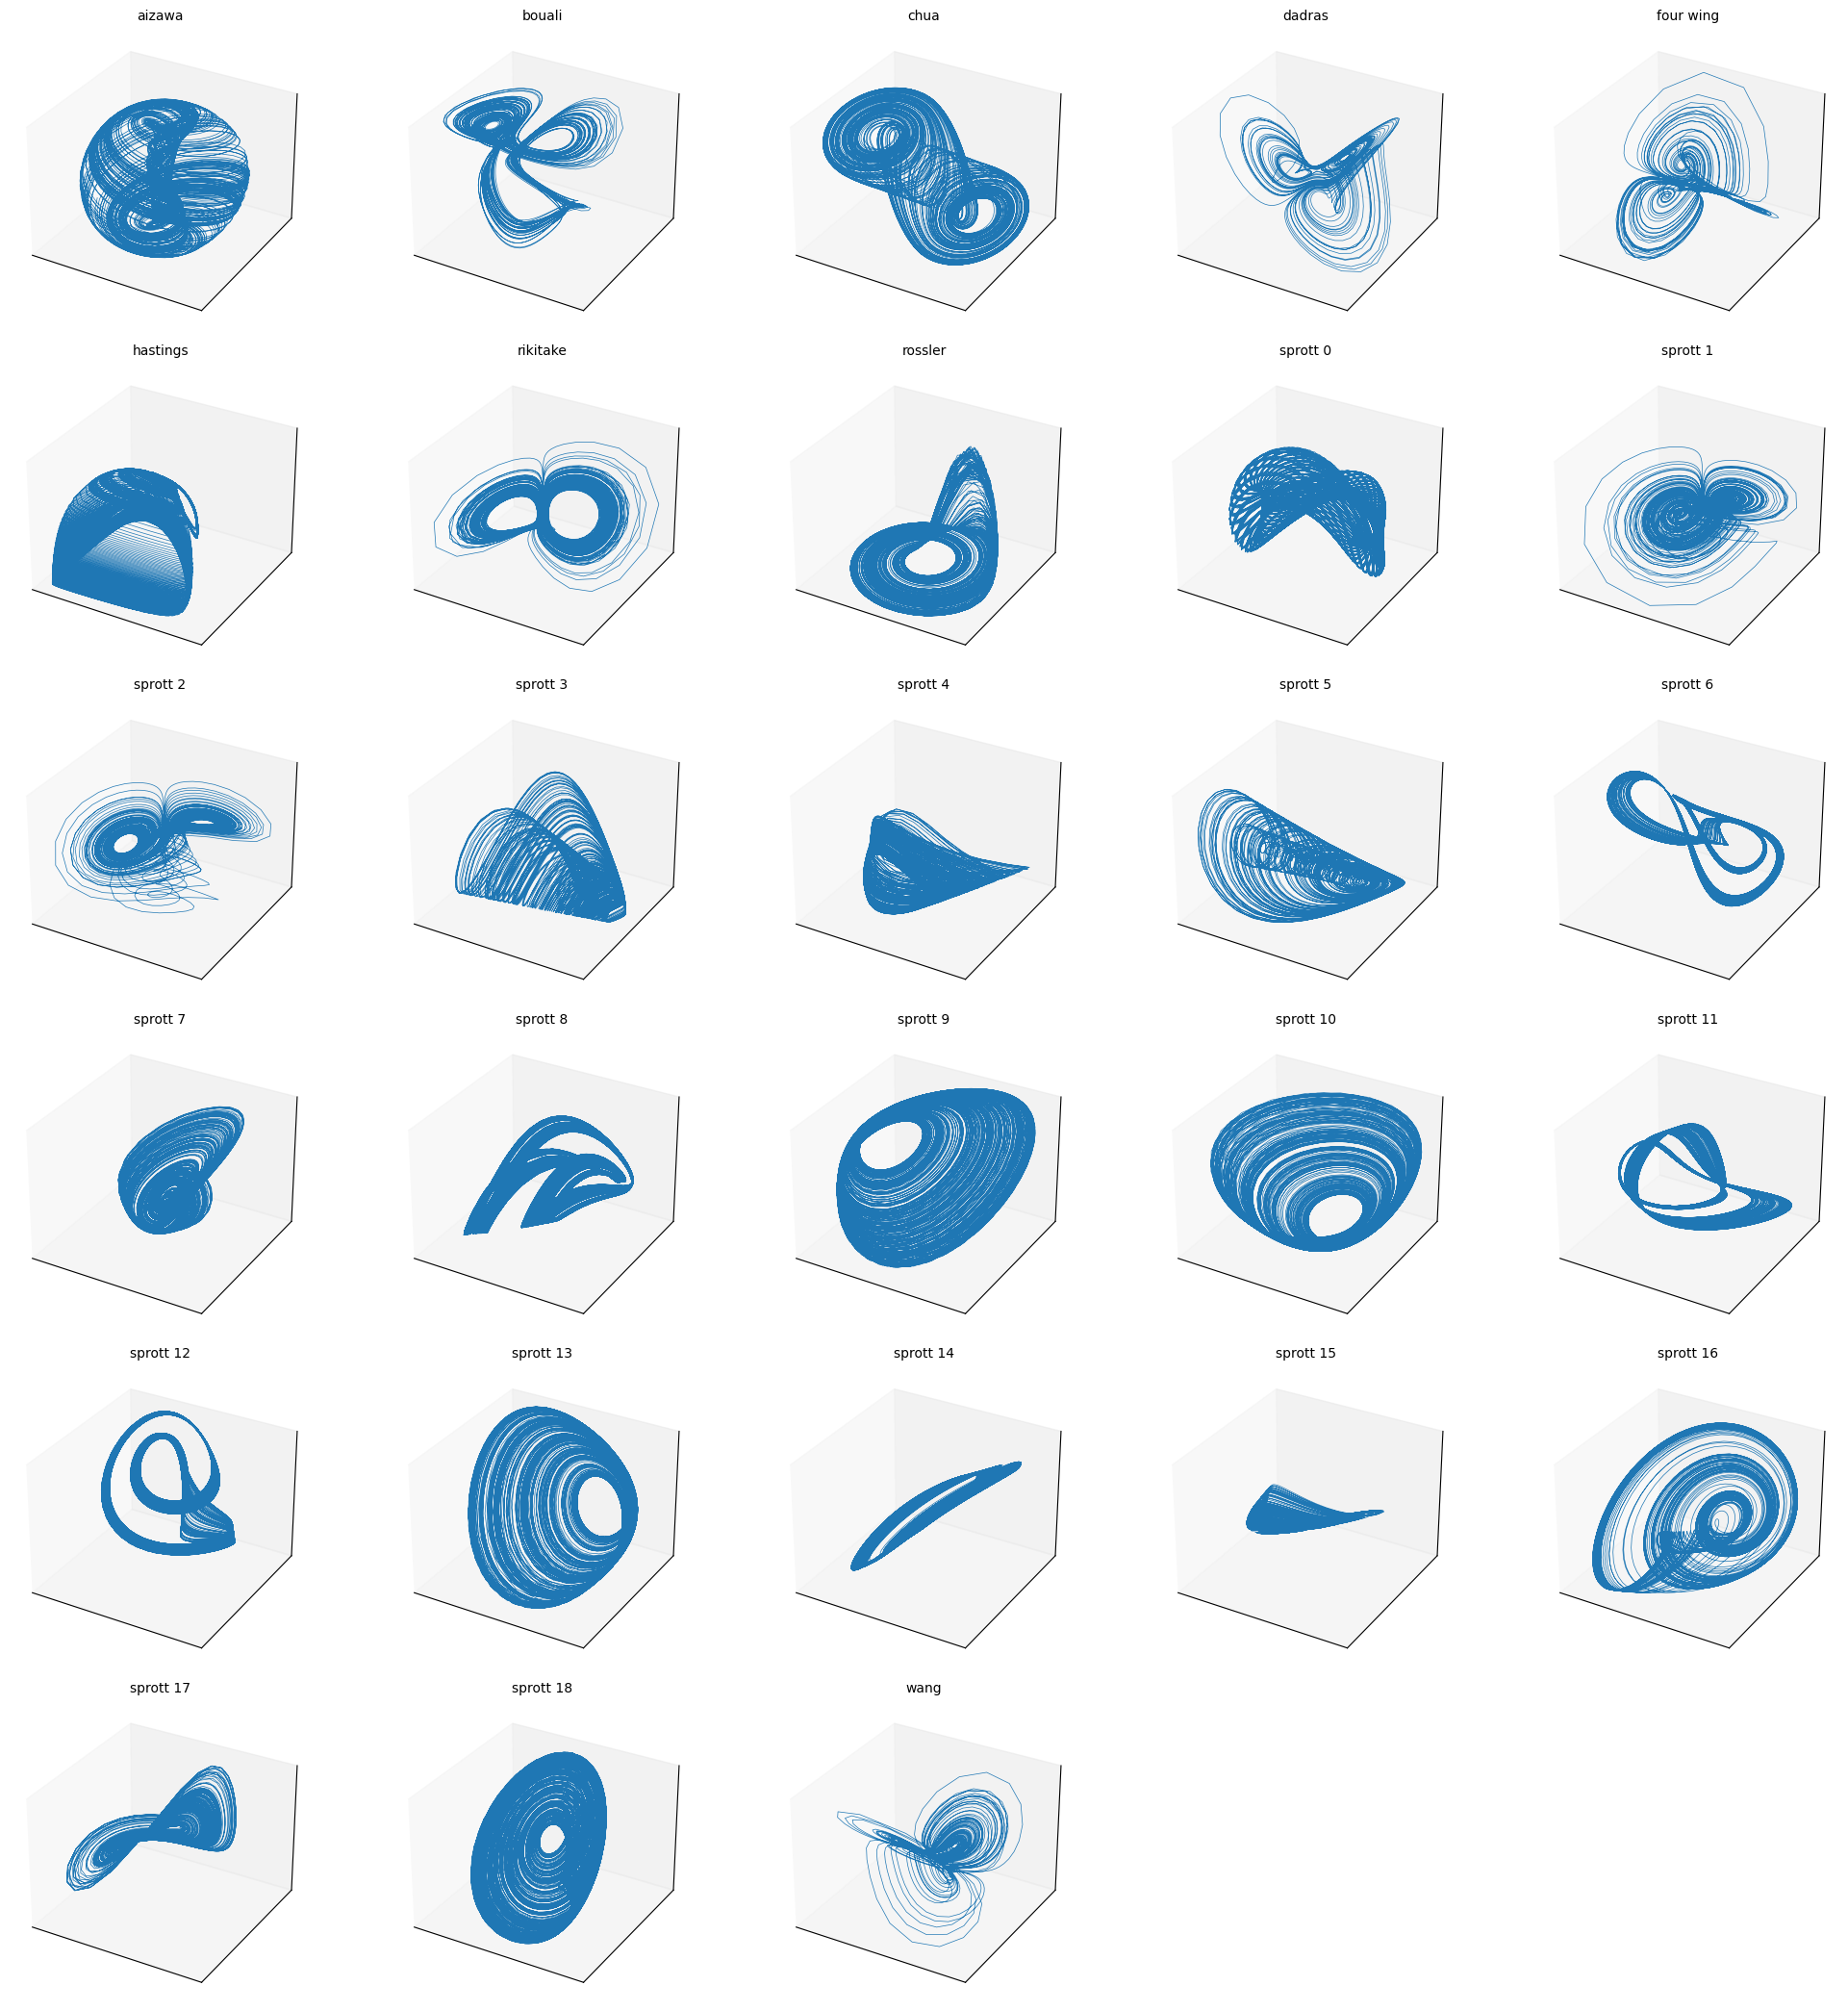

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import math

dt = 0.01
Tmax = 5000 # total length Tmax/dt

systems = [('aizawa', func_aizawa, 6),('bouali', func_bouali, 6), ('chua', func_chua, 4),('dadras', func_dadras, 2), 
    ('four wing', func_four_wing, 24), ('hastings', func_hastings, 100), ('rikitake', func_rikitake, 10), ('rossler', func_rossler, 16),
    ('sprott 0', func_sprott_0, 20),('sprott 1', func_sprott_1, 15),('sprott 2', func_sprott_2, 15), ('sprott 3', func_sprott_3, 13),
    ('sprott 4', func_sprott_4, 17),('sprott 5', func_sprott_5, 13),('sprott 6', func_sprott_6, 13), ('sprott 7', func_sprott_7, 18),
    ('sprott 8', func_sprott_8, 30),('sprott 9', func_sprott_9, 16),('sprott 10', func_sprott_10, 18), ('sprott 11', func_sprott_11, 10),
    ('sprott 12', func_sprott_12, 15), ('sprott 13', func_sprott_13, 15), ('sprott 14', func_sprott_14, 15), ('sprott 15', func_sprott_15, 15),
    ('sprott 16', func_sprott_16, 8), ('sprott 17', func_sprott_17, 17), ('sprott 18', func_sprott_18, 12), ('wang', func_wang, 5)]


print('number of training systems: ', len(systems))
# Integrate and collect training data
Training_data = []
for name, func, step in systems:
    x0 = [0.1*np.random.rand(), 0.1*np.random.rand(), 0.1*np.random.rand()]
    t_all = np.arange(0, Tmax*step, dt)
    sol = odeint(func, x0, t_all)[::step, :]
    Training_data.append(sol)
    print(name, np.shape(sol))

# Plot 3D Attractors
num_systems = len(systems)
ncols = 5
nrows = math.ceil(num_systems / ncols)

# Plot 3D Attractors
fig = plt.figure(figsize=(ncols * 4, nrows * 3.5))
for i, (name, data) in enumerate(zip([s[0] for s in systems], Training_data)):
    ax = fig.add_subplot(nrows, ncols, i + 1, projection='3d')
    ax.plot(data[1000:10000, 0], data[1000:10000, 1], data[1000:10000, 2], lw=0.5)
    ax.set_title(name, fontsize=10)
    # ax.view_init(elev=30, azim=45)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

plt.tight_layout()
plt.show()

We then prepare a target system that remains hidden from the model during training.

0
1
2


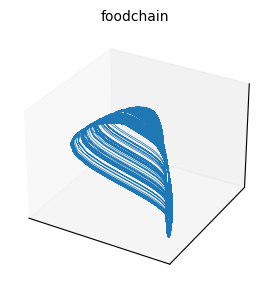

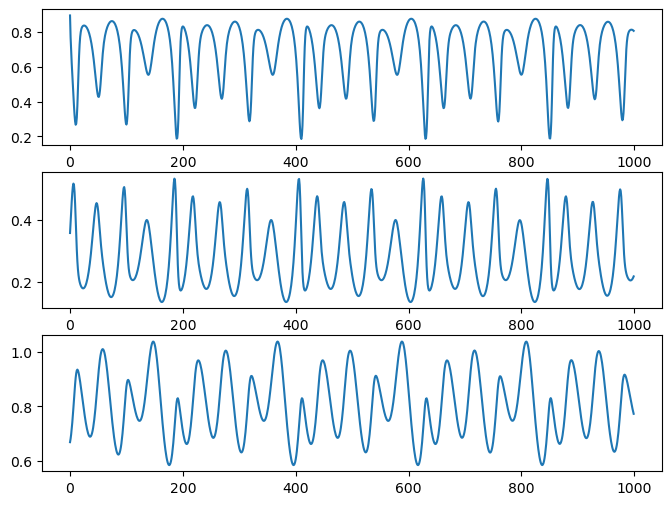

In [15]:
def func_foodchain(x, t):
    k, yc, yp = 0.98, 2.009, 2.876
    xc, xp = 0.4, 0.08
    r0, c0 = 0.16129, 0.5
    return np.array([x[0] * (1 - x[0] / k) - xc * yc * x[1] * x[0] / (x[0] + r0),
        xc * x[1] * (yc * x[0] / (x[0] + r0) - 1) - xp * yp * x[2] * x[1] / (x[1] + c0),
        xp * x[2] * (yp * x[1] / (x[1] + c0) - 1)])

dt = 0.1
Tmax = 12000 # total length Tmax/dt
transient = 3000
# simulation
Testing_data = []
t_all = np.arange(0, Tmax*10, dt)
z_dim_valid = False
attempts = 0

while not z_dim_valid and attempts < 500:
    print(attempts)
    x0 = [0.4 * np.random.rand() + 0.6, 0.4 * np.random.rand() + 0.15, 0.5 * np.random.rand() + 0.3]
    sol_foodchain = odeint(func_foodchain, x0, t_all)[::10, :]

    if np.min(sol_foodchain[transient:, 2]) > 0.5:
        z_dim_valid = True
    else:
        attempts += 1

Testing_data.append(sol_foodchain[transient:])
# plot
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sol_foodchain[1000:10000, 0], sol_foodchain[1000:10000, 1], sol_foodchain[1000:10000, 2], lw=0.5)
ax.set_title('foodchain', fontsize=10)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

# ax.view_init(-65, 135)

plt.tight_layout()
plt.show()

plot_length = 1000
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(range(plot_length), sol_foodchain[:plot_length , 0])
ax[1].plot(range(plot_length), sol_foodchain[:plot_length , 1])
ax[2].plot(range(plot_length), sol_foodchain[:plot_length , 2])

plt.show()

With the training and target systems prepared, we now proceed to define the transformer hyperparameters and construct the transformer model.

In [11]:
import random

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import argparse

# use gpu if we have, else we use cpu
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# set hyperparameters
dim = 3
input_size = 3
output_size = 3
hidden_size = 512
nhead = 4
num_layers = 4
d_model = 128
dropout = 0.2
noise_level = 0.05

seq_start = 1
sequence_length = 3000
batch_size = 16
num_epochs = 50

lr = 0.001

# transformer model backbone
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, output_size, d_model, nhead, num_layers, dim_feedforward, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()

        self.input_projection = nn.Linear(input_size, d_model)
        # Embedding layer for positional encoding
        self.pos_encoder = PositionalEncoding(d_model, 50000)
        # Transformer layer
        transformer_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                        dim_feedforward=dim_feedforward,
                                                        dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layers, num_layers=num_layers)
        # Linear layer to map the output
        self.decoder = nn.Linear(d_model, output_size)
        self.init_weights()
        self.d_model = d_model

    def init_weights(self):
        initrange = 0.1
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, return_attention=False, return_qkv=False):
        src = self.input_projection(src)
        src = self.pos_encoder(src)

        # without casual attention mask
        output = self.transformer_encoder(src)
        output = self.decoder(output)

        return output

    def generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)
        return mask


class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, seq_length: int) -> None:
        super().__init__()

        p_pos = torch.arange(0, seq_length).unsqueeze(1).to(device)
        p_i = torch.arange(0, d_model).to(device)

        PE = (p_pos / (1000**(2*p_i/d_model))).unsqueeze(0)
        PE[0, :, 0::2] = torch.sin(PE[:, :, 0::2])
        PE[0, :, 1::2] = torch.cos(PE[:, :, 1::2])
        self.PE = PE.to(device)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x + self.PE[:, :x.shape[1], :]

class SmoothnessLoss(nn.Module):
    def __init__(self, alpha=1.0, beta=1.0):
        super(SmoothnessLoss, self).__init__()
        self.alpha = alpha  # Weight for Laplacian regularization
        self.beta = beta    # Weight for Total Variation regularization

    def forward(self, predictions):
        # Compute second-order differences (Laplacian Regularization)
        laplacian = predictions[:, :-2] - 2 * predictions[:, 1:-1] + predictions[:, 2:]
        laplacian_loss = torch.mean(laplacian ** 2)

        # Compute absolute differences (Total Variation Regularization)
        total_variation = torch.abs(predictions[:, 1:] - predictions[:, :-1])
        total_variation_loss = torch.mean(total_variation)

        # Combine the losses
        return self.alpha * laplacian_loss + self.beta * total_variation_loss
    
# Define the combined loss function
def combined_loss_function(outputs, targets, smoothness_loss_fn, mse_weight=1.0, smoothness_weight=0.1):
    # Calculate MSE loss
    mse_loss = nn.MSELoss()(outputs, targets)
    
    # Calculate smoothness loss
    smoothness_loss = smoothness_loss_fn(outputs)
    
    # Combine the losses
    total_loss = mse_weight * mse_loss + smoothness_weight * smoothness_loss
    return total_loss

# create transformer model
model = TimeSeriesTransformer(input_size, output_size, d_model, nhead, num_layers, hidden_size, dropout).to(device)
# print model structure
print(model)
# optimization setting
criterion = nn.MSELoss()
smoothness_loss_fn = SmoothnessLoss(alpha=0.5, beta=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

TimeSeriesTransformer(
  (input_projection): Linear(in_features=3, out_features=128, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (decoder): Linear(in_features=128, out_features=3, bias=True)
)


We prepare the training data in the appropriate format required by the transformer model. This includes normalizing the data, reshaping it into sequences suitable for input, and creating a data loader to efficiently feed batches into the model during training.

In [12]:
from sklearn.preprocessing import MinMaxScaler

def reshape_data(data, sequence_length, dim):
    # Assuming data is a 3D numpy array where it should be n * sequence_length * dim
    # Reshape the data to have the shape of [n, sequence_length, dim]
    n = data.shape[0] // sequence_length
    data = data[:n * sequence_length, :dim]
    data = data.reshape(n, sequence_length, dim)

    return data

# normalize data
train_data_norm = []
for train_data in Training_data:
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(train_data)
    train_data_norm.append(normalized_data)

train_data_reshape = []
for i in range(len(train_data_norm)):
    data_return = reshape_data(train_data_norm[i], sequence_length, dim)
    train_data_reshape.append(data_return)

combined_data = np.concatenate(train_data_reshape, axis=0)
print(np.shape(combined_data))

# create train dataLoader
train_dataset = TensorDataset(torch.tensor(combined_data, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

(4648, 3000, 3)


Everything is prepared - let's begin training the model. In each iteration, we adopt a ``triple-randomness'' training strategy, where we randomly vary the training system, the input sequence length, and the sparsity level. This encourages the model to generalize across different dynamics and levels of missing information.

  0%|          | 0/291 [00:00<?, ?it/s]e:\apps\anaconda\envs\ztorch\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
100%|██████████| 291/291 [00:24<00:00, 11.80it/s]


Epoch [1/50], Loss: 0.04793957248330116


100%|██████████| 291/291 [00:23<00:00, 12.44it/s]


Epoch [2/50], Loss: 0.047249313443899155


100%|██████████| 291/291 [00:23<00:00, 12.18it/s]


Epoch [3/50], Loss: 0.027247777208685875


100%|██████████| 291/291 [00:25<00:00, 11.44it/s]


Epoch [4/50], Loss: 0.03318914771080017


100%|██████████| 291/291 [00:23<00:00, 12.26it/s]


Epoch [5/50], Loss: 0.023648763075470924


100%|██████████| 291/291 [00:23<00:00, 12.37it/s]


Epoch [6/50], Loss: 0.03856980800628662


100%|██████████| 291/291 [00:23<00:00, 12.25it/s]


Epoch [7/50], Loss: 0.04193556681275368


100%|██████████| 291/291 [00:23<00:00, 12.49it/s]


Epoch [8/50], Loss: 0.028051186352968216


100%|██████████| 291/291 [00:24<00:00, 12.05it/s]


Epoch [9/50], Loss: 0.022338923066854477


100%|██████████| 291/291 [00:25<00:00, 11.63it/s]


Epoch [10/50], Loss: 0.015108970925211906


100%|██████████| 291/291 [00:22<00:00, 13.18it/s]


Epoch [11/50], Loss: 0.018203938379883766


100%|██████████| 291/291 [00:22<00:00, 13.22it/s]


Epoch [12/50], Loss: 0.007226258050650358


100%|██████████| 291/291 [00:22<00:00, 12.97it/s]


Epoch [13/50], Loss: 0.011186438612639904


100%|██████████| 291/291 [00:23<00:00, 12.41it/s]


Epoch [14/50], Loss: 0.004876438528299332


100%|██████████| 291/291 [00:21<00:00, 13.39it/s]


Epoch [15/50], Loss: 0.005657465662807226


100%|██████████| 291/291 [00:23<00:00, 12.28it/s]


Epoch [16/50], Loss: 0.011762058362364769


100%|██████████| 291/291 [00:23<00:00, 12.57it/s]


Epoch [17/50], Loss: 0.005103164352476597


100%|██████████| 291/291 [00:24<00:00, 12.00it/s]


Epoch [18/50], Loss: 0.01930210366845131


100%|██████████| 291/291 [00:20<00:00, 13.96it/s]


Epoch [19/50], Loss: 0.024523846805095673


100%|██████████| 291/291 [00:25<00:00, 11.47it/s]


Epoch [20/50], Loss: 0.004883054178208113


100%|██████████| 291/291 [00:21<00:00, 13.42it/s]


Epoch [21/50], Loss: 0.011910559609532356


100%|██████████| 291/291 [00:21<00:00, 13.24it/s]


Epoch [22/50], Loss: 0.00831101555377245


100%|██████████| 291/291 [00:23<00:00, 12.58it/s]


Epoch [23/50], Loss: 0.008901593275368214


100%|██████████| 291/291 [00:24<00:00, 12.12it/s]


Epoch [24/50], Loss: 0.0076809655874967575


100%|██████████| 291/291 [00:23<00:00, 12.26it/s]


Epoch [25/50], Loss: 0.008917274884879589


100%|██████████| 291/291 [00:23<00:00, 12.34it/s]


Epoch [26/50], Loss: 0.011422136798501015


100%|██████████| 291/291 [00:22<00:00, 12.92it/s]


Epoch [27/50], Loss: 0.006376946344971657


100%|██████████| 291/291 [00:23<00:00, 12.64it/s]


Epoch [28/50], Loss: 0.010787507519125938


100%|██████████| 291/291 [00:22<00:00, 12.93it/s]


Epoch [29/50], Loss: 0.0059843240305781364


100%|██████████| 291/291 [00:23<00:00, 12.38it/s]


Epoch [30/50], Loss: 0.009848016314208508


100%|██████████| 291/291 [00:23<00:00, 12.25it/s]


Epoch [31/50], Loss: 0.007967749610543251


100%|██████████| 291/291 [00:25<00:00, 11.39it/s]


Epoch [32/50], Loss: 0.008152947761118412


100%|██████████| 291/291 [00:24<00:00, 11.99it/s]


Epoch [33/50], Loss: 0.013388642109930515


100%|██████████| 291/291 [00:24<00:00, 12.07it/s]


Epoch [34/50], Loss: 0.011414659209549427


100%|██████████| 291/291 [00:23<00:00, 12.17it/s]


Epoch [35/50], Loss: 0.012201615609228611


100%|██████████| 291/291 [00:22<00:00, 12.68it/s]


Epoch [36/50], Loss: 0.0049707223661243916


100%|██████████| 291/291 [00:23<00:00, 12.49it/s]


Epoch [37/50], Loss: 0.00493528600782156


100%|██████████| 291/291 [00:22<00:00, 12.81it/s]


Epoch [38/50], Loss: 0.007965696044266224


100%|██████████| 291/291 [00:25<00:00, 11.36it/s]


Epoch [39/50], Loss: 0.010971685871481895


100%|██████████| 291/291 [00:24<00:00, 11.75it/s]


Epoch [40/50], Loss: 0.003667137585580349


100%|██████████| 291/291 [00:25<00:00, 11.54it/s]


Epoch [41/50], Loss: 0.004523084498941898


100%|██████████| 291/291 [00:23<00:00, 12.45it/s]


Epoch [42/50], Loss: 0.00577889196574688


100%|██████████| 291/291 [00:23<00:00, 12.18it/s]


Epoch [43/50], Loss: 0.013528517447412014


100%|██████████| 291/291 [00:24<00:00, 12.05it/s]


Epoch [44/50], Loss: 0.004236751236021519


100%|██████████| 291/291 [00:24<00:00, 11.97it/s]


Epoch [45/50], Loss: 0.008636455982923508


100%|██████████| 291/291 [00:22<00:00, 12.74it/s]


Epoch [46/50], Loss: 0.006272890139371157


100%|██████████| 291/291 [00:23<00:00, 12.53it/s]


Epoch [47/50], Loss: 0.004934106022119522


100%|██████████| 291/291 [00:24<00:00, 11.99it/s]


Epoch [48/50], Loss: 0.006153943948447704


100%|██████████| 291/291 [00:24<00:00, 11.70it/s]


Epoch [49/50], Loss: 0.005789231508970261


100%|██████████| 291/291 [00:22<00:00, 12.74it/s]

Epoch [50/50], Loss: 0.005437816493213177


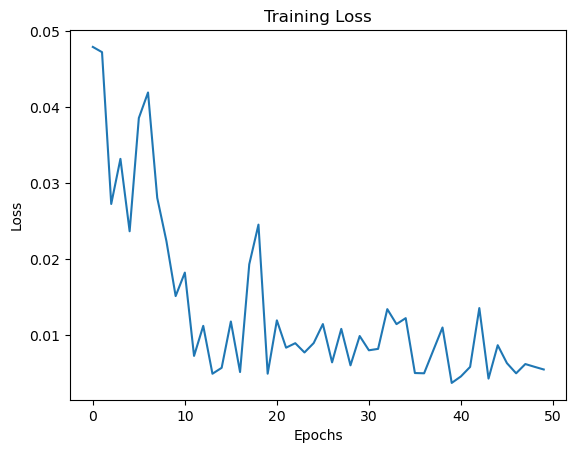

In [13]:
from tqdm import tqdm

def mask_data_transformer(x, mask_ratio, mask_as=0):
    # x is expected to be a 2D array with shape [sequence_length, features]
    sequence_length, features = x.shape
    mask_array = np.ones((sequence_length, features), dtype=bool)

    total_elements = sequence_length * features
    mask_number = int(total_elements * mask_ratio)

    flat_indices = np.random.choice(total_elements, mask_number, replace=False)
    masked_indices = np.unravel_index(flat_indices, (sequence_length, features))

    # Apply the mask to the data array and update the mask array
    x[masked_indices] = mask_as
    mask_array[masked_indices] = False

    return x, mask_array.astype(int)

# train the model
train_losses = []
for epoch in range(int(num_epochs)):
    for data in tqdm(train_loader):
        inputs = data[0].to(device)  # Shape should be [batch_size, sequence_length, input_size]

        # choose a random sequence_legnth
        random_seq_length = random.randint(seq_start, sequence_length)
        inputs = inputs[:, :random_seq_length, :]
        targets = inputs.clone()
        # Add Gaussian noise to the inputs
        noise = torch.normal(mean=0.0, std=noise_level, size=inputs.shape).to(device)
        noisy_inputs = inputs + inputs * noise
        inputs = noisy_inputs

        inputs_new = torch.zeros((inputs.shape[0], inputs.shape[1], input_size)).to(device)

        for i in range(inputs.shape[0]):
            # generate a random number between 0.0~1.0 as the mask ratio
            mask_ratio = random.uniform(0.0, 1.0)
            numpy_input, temp_mask = mask_data_transformer(inputs[i].cpu().numpy(), mask_ratio)

            inputs_new[i, :, :dim] = torch.from_numpy(numpy_input).to(device)

        outputs = model(inputs_new)
        loss = combined_loss_function(outputs, targets, smoothness_loss_fn, mse_weight=1.0, smoothness_weight=0.1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
    train_losses.append(loss)

train_losses_cpu = [loss.item() for loss in train_losses]
# Plot the training loss
plt.plot(train_losses_cpu)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Now that we have a well-trained transformer on the training systems, we proceed to prepare the data for the target system (the food chain system) and evaluate the model's performance on it.

Test Loss: 0.0094


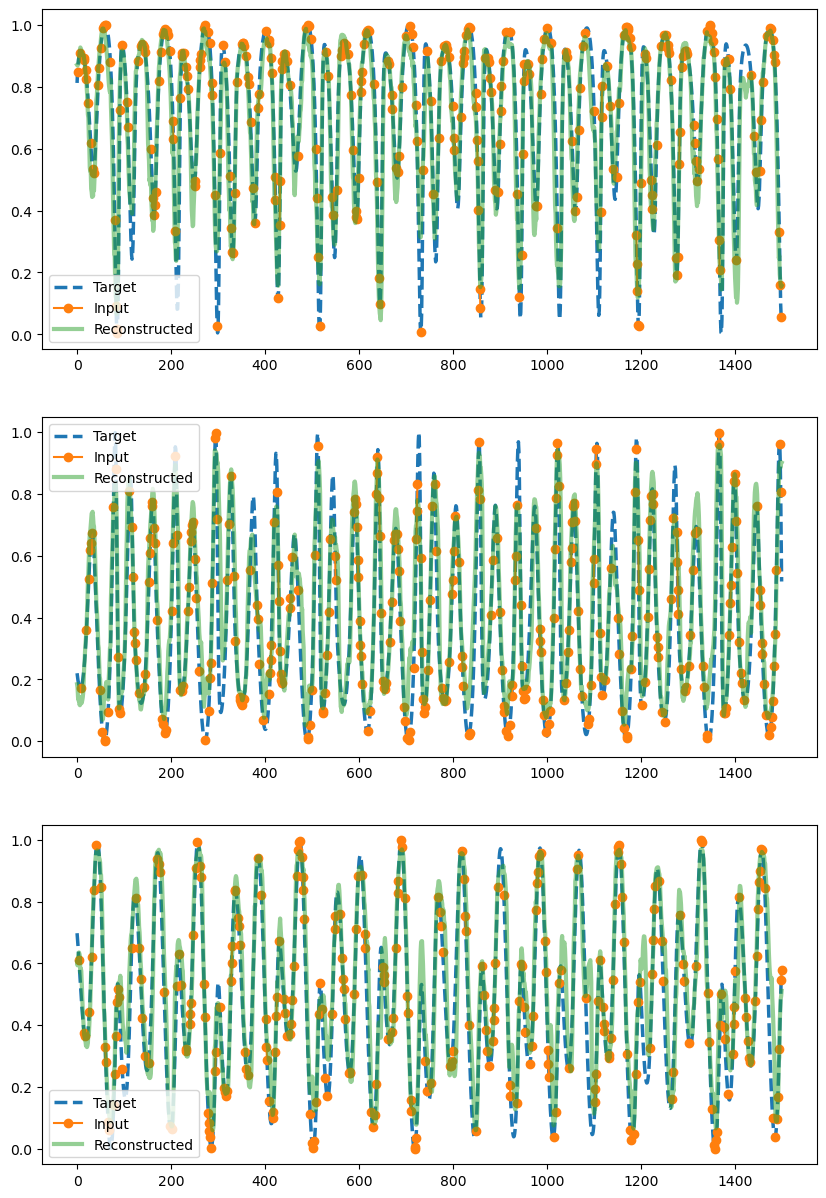

In [17]:
import copy
# normalization
test_data_norm = []
for test_data in Testing_data:
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(test_data)
    test_data_norm.append(normalized_data)

test_data_reshape = []
for i in range(len(test_data_norm)):
    data_return = reshape_data(test_data_norm[i], sequence_length, dim)
    test_data_reshape.append(data_return)

model.eval()
testing_seq_length = 1500 # testing sequence length
testing_batch_size = 1

mask_ratio = 0.8 # testing sparsity

sample_for_system = {}

with torch.no_grad():
    test_losses = []

    data_test = test_data_reshape[0]
    test_dataset = TensorDataset(torch.tensor(data_test, dtype=torch.float32))
    test_loader = DataLoader(test_dataset, batch_size=testing_batch_size, shuffle=False)

    for data in test_loader:
        inputs = data[0].to(device)

        # choose a random sequence_legnth to train
        inputs = inputs[:, :testing_seq_length, :]
        targets = copy.deepcopy(inputs)

        inputs_new = torch.zeros((inputs.shape[0], inputs.shape[1], input_size)).to(device)
        for i in range(inputs.shape[0]):
            numpy_input, temp_mask = mask_data_transformer(inputs[i].cpu().numpy(), mask_ratio)

            inputs_new[i, :, :dim] = torch.from_numpy(numpy_input).to(device)

        outputs = model(inputs_new)

        loss = criterion(outputs, targets)
        test_losses.append(loss.item())
        # save data
        if not sample_for_system:
            sample_for_system['input'] = inputs_new[:, :, :dim].cpu().numpy()
            sample_for_system['target'] = targets.cpu().numpy()

            reconstructed = outputs.cpu().numpy()

            sample_for_system['reconstructed'] = reconstructed

    avg_test_loss = sum(test_losses) / len(test_losses)
    print(f'Test Loss: {avg_test_loss:.4f}')


input_data = sample_for_system['input'].reshape(-1, dim)
reconstructed_data = sample_for_system['reconstructed'].reshape(-1, dim)
target_data = sample_for_system['target'].reshape(-1, dim)

plot_length = np.shape(input_data)[0]
# Convert 0 in input_data to NaN for plotting
input_data[input_data == 0] = np.nan
fig, axes = plt.subplots(dim, 1, figsize=(10, 15))
linewidth = 3
# Plot data for each feature
for i in range(dim):  # Loop through each feature
    ax = axes[i]
    ax.plot(target_data[:plot_length, i], label='Target', linestyle='--', linewidth=2.5)
    ax.plot(input_data[:plot_length, i], label='Input', marker='o')
    ax.plot(reconstructed_data[:plot_length, i], label='Reconstructed', linewidth=linewidth, alpha=0.5)
    ax.legend()

# Save the figure
plt.show()

Finally, we use the trained transformer model to recover the dynamics of the food chain system under a high sparsity level. For better experimental performance, you can achieve a more generalized model by training it multiple times and selecting the best performed on Evaluation (not target) systems.

It is worth noting that there is still significant room for performance improvement. As demonstrated in our paper, the model's performance on the target system strongly depends on the number of training systems, following a power-law relationship. We have shown it in Readme.


